In [ ]:
"""
Python for Finance: Mastering data driven finance.
Chapter 12 - Stochastics

This chapter introduces 

"Random Numbers"
Pseudo-random numbers build basis for all simulation efforts.

"Simulation"
In finance two simulation taks are of importance: simulation of random variables and stochastic prosesses.

"Valuation"
Two main disiplines when it comes to valuation are valuation with Euro exercise and US exercise
also Bermudan exercise(a finite set of spefific dates)

"Risk Measuers"
Simulation lends well to the calculation of risk like[value at risk, credit value-at-risk and credit valuation adjustments]
"""


In [4]:
import math 
import numpy as np 
import numpy.random as npr
from pylab import plt, mpl

plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline


# Random Numbers 


npr.seed(100)
np.set_printoptions(precision=4)

In [5]:
npr.rand(10)

array([0.5434, 0.2784, 0.4245, 0.8448, 0.0047, 0.1216, 0.6707, 0.8259,
       0.1367, 0.5751])

In [6]:
npr.rand(10, 5)

array([[0.8913, 0.2092, 0.1853, 0.1084, 0.2197],
       [0.9786, 0.8117, 0.1719, 0.8162, 0.2741],
       [0.4317, 0.94  , 0.8176, 0.3361, 0.1754],
       [0.3728, 0.0057, 0.2524, 0.7957, 0.0153],
       [0.5988, 0.6038, 0.1051, 0.3819, 0.0365],
       [0.8904, 0.9809, 0.0599, 0.8905, 0.5769],
       [0.7425, 0.6302, 0.5818, 0.0204, 0.21  ],
       [0.5447, 0.7691, 0.2507, 0.2859, 0.8524],
       [0.975 , 0.8849, 0.3595, 0.5989, 0.3548],
       [0.3402, 0.1781, 0.2377, 0.0449, 0.5054]])

In [7]:
a = 5
b = 10

npr.rand(10) * (b - a) + a

array([6.8813, 7.964 , 8.1497, 5.713 , 9.6692, 9.7319, 8.0115, 6.9388,
       6.8159, 6.0217])

In [9]:
npr.rand(4, 4) * (b - a) + a

array([[5.5677, 5.6651, 7.2802, 5.7987],
       [9.8082, 9.1881, 7.6008, 6.0914],
       [5.6746, 9.8954, 8.5352, 9.2999],
       [6.9359, 6.2542, 6.4972, 9.2845]])

Text(0.5, 1.0, 'Poisson')

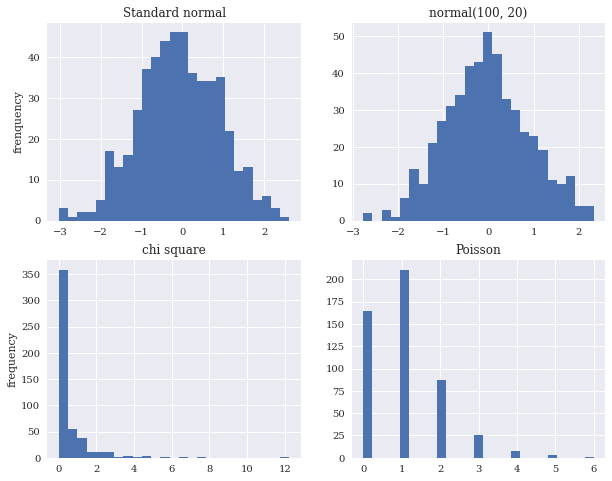

In [12]:
"""
Next plot visualizes random draws from the following distribution.

* Standard normal with mean of 0 and std of 1.
* Normal with mean of 100 and std of 20.
* Chi square with 0.5 degress of freedom.
* Poisson with lambda of 1.

The result is 3 continuos distributions and the discrete one (Poisson)
Poisson is used to simulate the arrival of (rare) extrenal events.
Like a jump or drop of an instrument or exogenic shock
"""
sample_size = 500

rn1 = npr.standard_normal(sample_size) # Standard normally distributed random numbers
rn2 = npr.standard_normal(sample_size) # Nprmally distributed random numbers
rn3 = npr.chisquare(df=0.5, size=sample_size) # Chi-square distributed random numbers
rn4 = npr.poisson(lam=1.0, size=sample_size) # Poisson distributed numbers

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,
                                              figsize=(10,8))

ax1.hist(rn1, bins=25)
ax1.set_title('Standard normal')
ax1.set_ylabel('frenquency')
ax2.hist(rn2, bins=25)
ax2.set_title('normal(100, 20)')
ax3.hist(rn3, bins=25)
ax3.set_title('chi square')
ax3.set_ylabel('frequency')
ax4.hist(rn4, bins=25)
ax4.set_title('Poisson')




In [ ]:
"""
#Simulation

Monte Carlo simulation (MCS) is one of the most important numerical techniques in fianace.
It is flaexible numerical method when it comes to the evalutaion of math expressions.
The valuation of financial derivatives. 
Hundreds of thousands even millions of computaions have to be carried out to come up with a single value estimate.
"""

In [21]:
"""
# Random Variables 
The Black-Scholes-Merton setup for option pricing.

The variables and parameters have the following meaning:

ST = Index leel at date T
r = Constant riskless short rate
o = Constant volatility(= std of returns) of S
z = Standard normally distributed variable
"""

S0 = 100
r = 0.05
sigma = 0.25
T = 2.0
I = 10000 
ST1 = S0 * np.exp((r - 0.5 * sigma ** 2) * T +
                 sigma * math.sqrt(T) * npr.standard_normal(I))
ST2 = S0 * npr.lognormal((r - 0.5 * sigma ** 2) * T,
                        sigma * math.sqrt(T), size=I)

Text(0, 0.5, 'frequency')

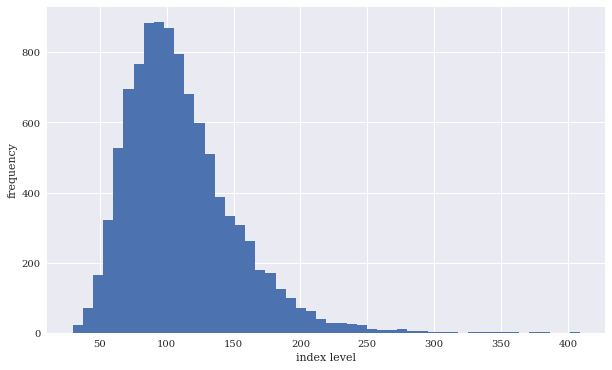

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(ST1, bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')

In [25]:
"""
A statistical mements of the sulting distributions.
The scipy.stats subpackage and helper function prove useful
"""
import scipy.stats as scs

def print_stats(a1, a2):
    sta1 = scs.describe(a1)
    sta2 = scs.describe(a2)
    print('%14s %14s %14s' %
    ('statistic', 'data set 1', 'data set 2'))
    print(45 * "-")
    print('%14s %14.3f %14.3f' % ('size', sta1[0], sta2[0]))
    print('%14s %14.3f %14.3f' % ('min', sta1[1][0], sta2[1][0]))
    print('%14s %14.3f %14.3f' % ('max', sta1[1][1], sta2[1][1]))
    print('%14s %14.3f %14.3f' % ('mean', sta1[2], sta2[2]))
    print('%14s %14.3f %14.3f' % ('std', np.sqrt(sta1[3]), np.sqrt(sta2[3])))
    print('%14s %14.3f %14.3f' % ('skew', sta1[4], sta2[4]))
    print('%14s %14.3f %14.3f' % ('kurtosis', sta1[5], sta2[5]))


    
    
    
print_stats(ST1,ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         29.665         27.105
           max        409.110        427.652
          mean        110.578        110.225
           std         40.408         39.764
          skew          1.187          1.091
      kurtosis          2.664          2.218
